<a href="https://colab.research.google.com/github/ashiiifr/project1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import kagglehub
warnings.filterwarnings('ignore')

In [ ]:
# Download and load dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
df = pd.read_csv(path+'/data.csv')

100%|██████████| 48.6k/48.6k [00:00<00:00, 41.8MB/s]

Extracting files...


In [ ]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (569, 33)

First 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Data preprocessing
df = df.drop(['id', 'Unnamed: 32'], axis=1)
print("\nColumns after dropping ID and Unnamed:")
print(df.columns.tolist())


Columns after dropping ID and Unnamed:
['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
# Check for missing values
print("\nMissing values:", df.isnull().sum().sum())


Missing values: 0


In [ ]:
# Target distribution
print("\nTarget distribution:")
print(df['diagnosis'].value_counts())


Target distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Feature statistics
print("\nFeature statistics:")
df.describe()


Feature statistics:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Correlation analysis
corr_matrix = df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["diagnosis"]) > 0.5]
print("\nFeatures with high correlation to diagnosis:")
print(top_corr_features.tolist())


Features with high correlation to diagnosis:
['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


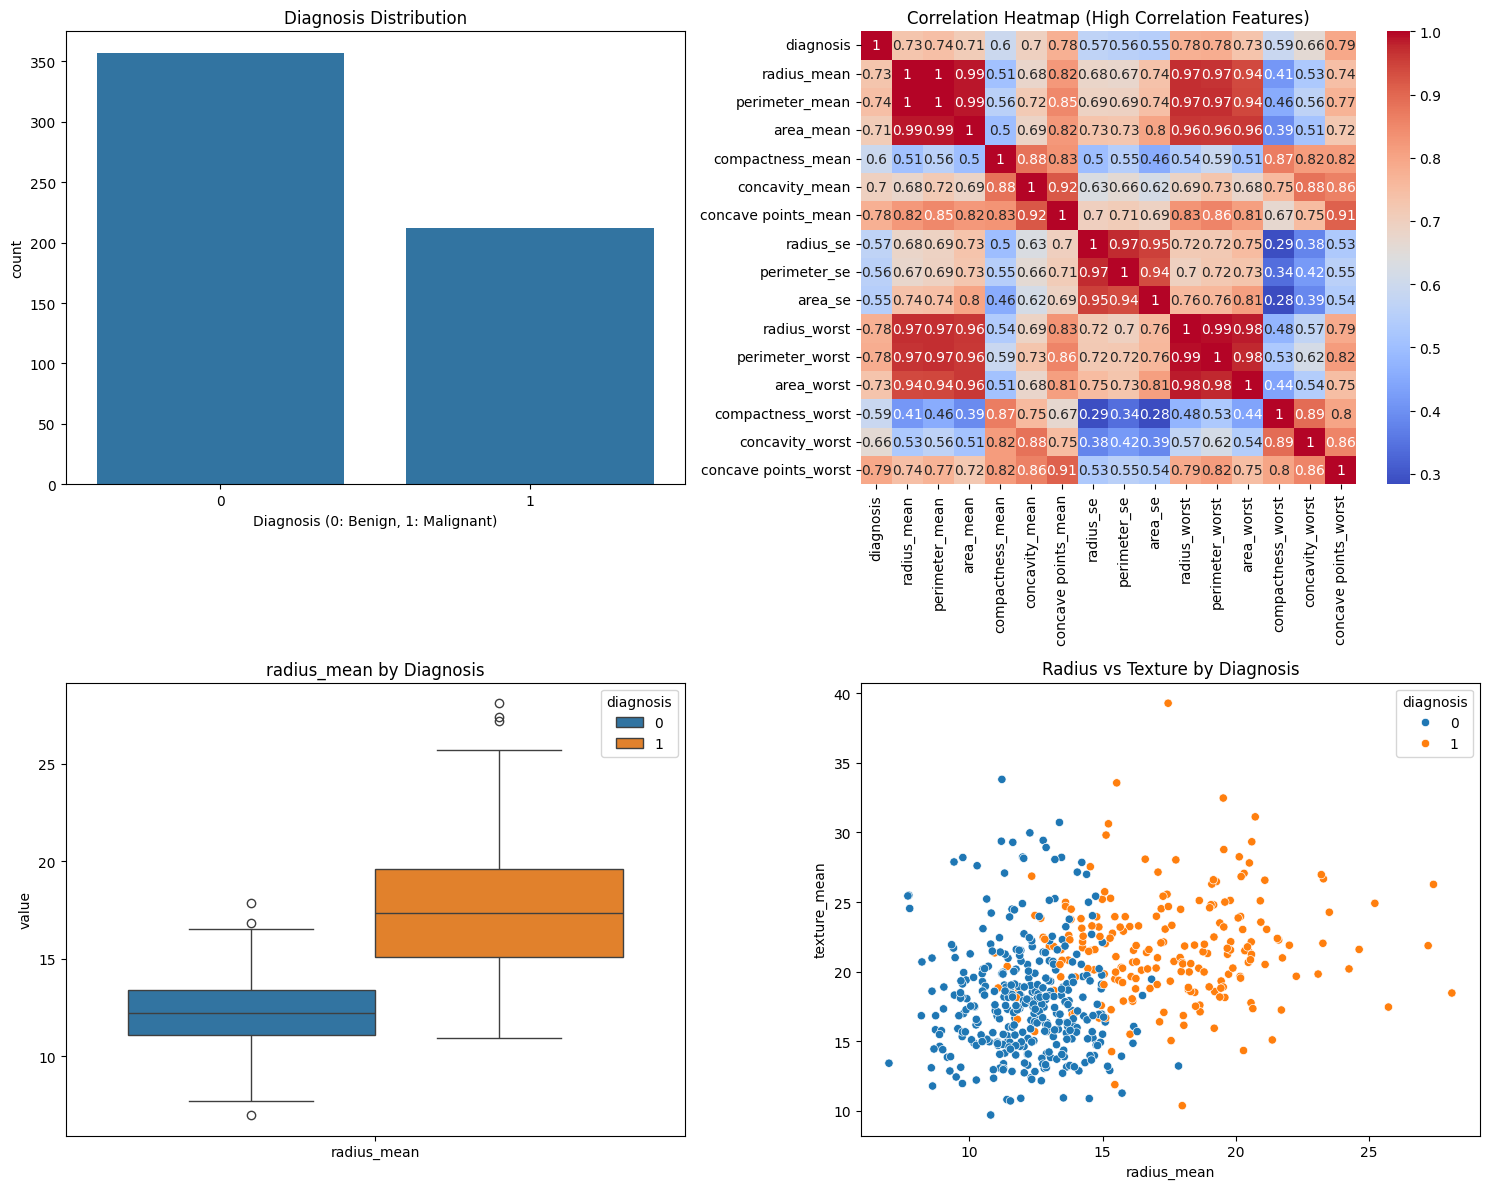

In [ ]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Diagnosis distribution
sns.countplot(data=df, x='diagnosis', ax=axes[0,0])
axes[0,0].set_title('Diagnosis Distribution')
axes[0,0].set_xlabel('Diagnosis (0: Benign, 1: Malignant)')

# 2. Correlation heatmap
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Correlation Heatmap (High Correlation Features)')

# 3. Feature distribution comparison
feature_to_plot = 'radius_mean'
df_melted = df.melt(id_vars=['diagnosis'], value_vars=[feature_to_plot])
sns.boxplot(data=df_melted, x='variable', y='value', hue='diagnosis', ax=axes[1,0])
axes[1,0].set_title(f'{feature_to_plot} by Diagnosis')
axes[1,0].set_xlabel('')

# 4. Pairplot for top features
top_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.scatterplot(data=df[top_features], x='radius_mean', y='texture_mean', hue='diagnosis', ax=axes[1,1])
axes[1,1].set_title('Radius vs Texture by Diagnosis')

plt.tight_layout()
plt.show()

In [ ]:
# Interactive 3D visualization
fig = px.scatter_3d(df,
                    x='radius_mean',
                    y='texture_mean',
                    z='perimeter_mean',
                    color='diagnosis',
                    title='3D Scatter Plot: Radius vs Texture vs Perimeter',
                    labels={'diagnosis': 'Diagnosis (0: Benign, 1: Malignant)'})
fig.show()

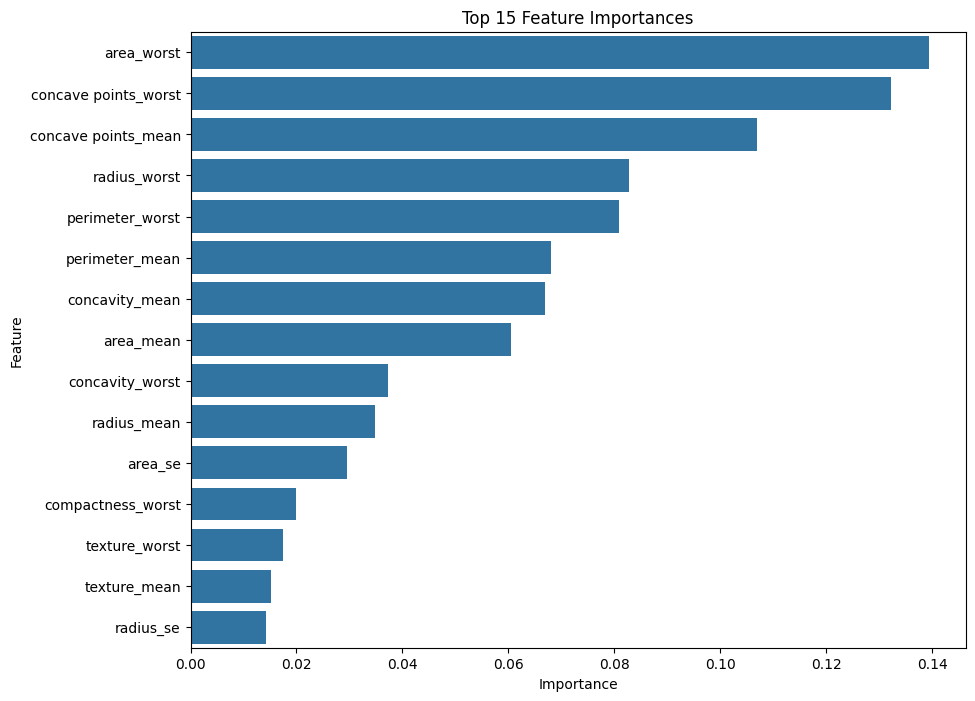

In [ ]:
# Feature importance visualization
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Model comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    if name == 'Random Forest':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Logistic Regression Results:
Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM Results:
Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro 

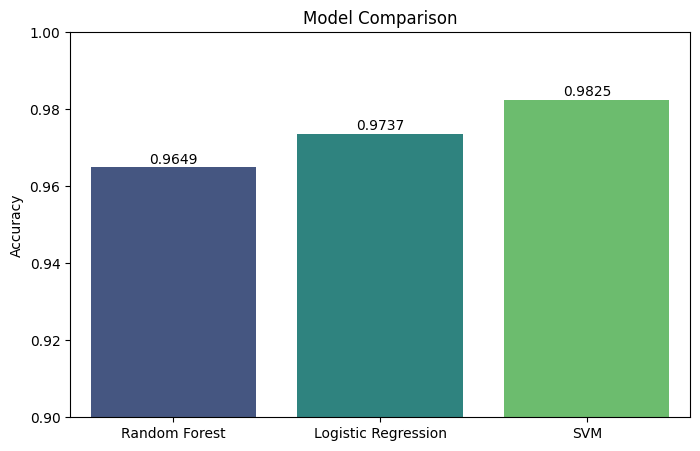

In [ ]:
# Model comparison visualization
plt.figure(figsize=(8, 5))
models_names = list(results.keys())
accuracies = list(results.values())
sns.barplot(x=models_names, y=accuracies, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.9, 1.0)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center')
plt.show()

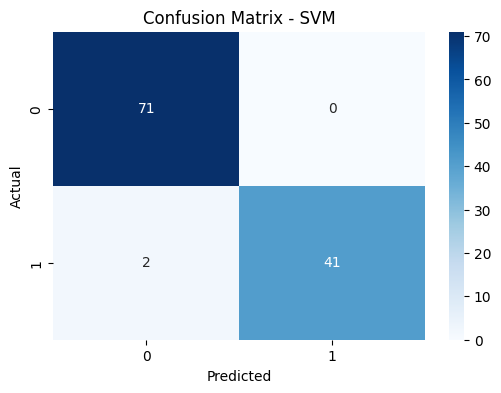

In [ ]:
# Confusion matrix for best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

if best_model_name == 'Random Forest':
    y_pred_best = best_model.predict(X_test)
else:
    y_pred_best = best_model.predict(X_test_scaled)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Advanced visualization: Parallel coordinates
fig = px.parallel_coordinates(
    df[top_features],
    color='diagnosis',
    title='Parallel Coordinates Plot for Top Features',
    color_continuous_scale=px.colors.diverging.Tealrose
)
fig.show()

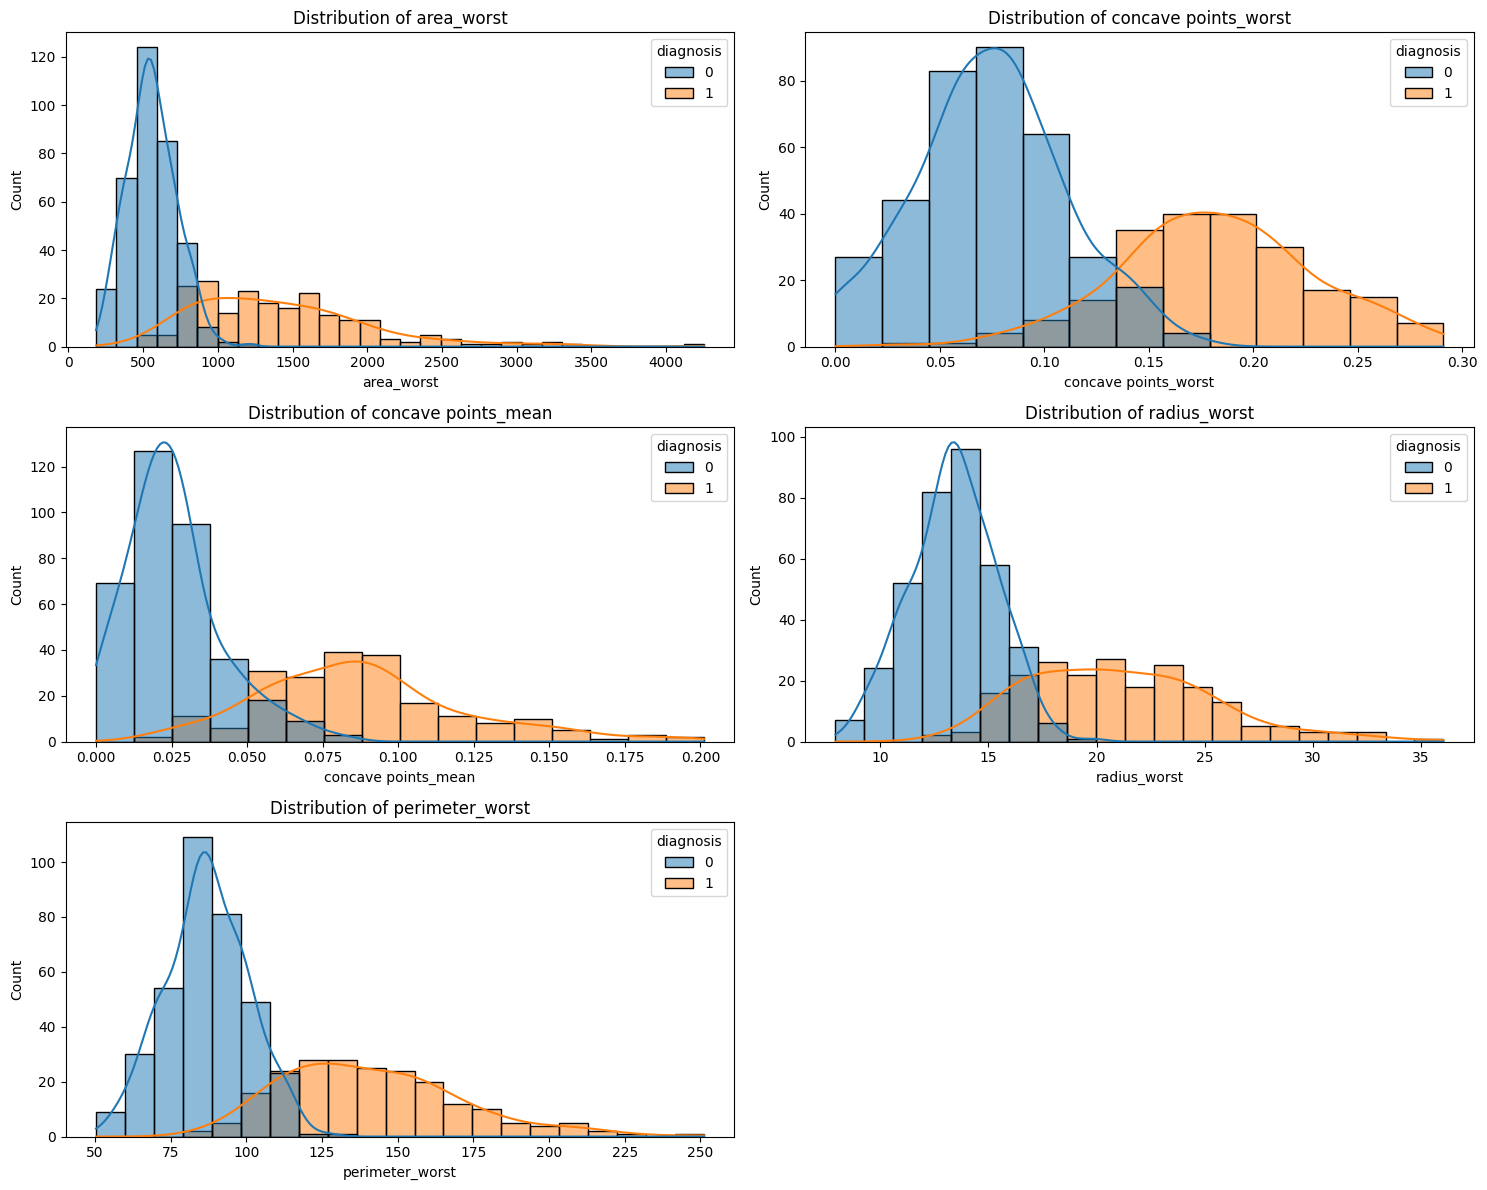

In [ ]:
# Distribution of top features by diagnosis
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
top_features_list = importance_df['feature'].head(6).tolist()

for i, feature in enumerate(top_features_list):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Remove empty subplot
axes[2, 1].remove()
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics by diagnosis
summary_stats = df.groupby('diagnosis').agg(['mean', 'std'])
print("\nSummary Statistics by Diagnosis:")
summary_stats.head()


Summary Statistics by Diagnosis:


radius_mean           texture_mean           perimeter_mean  \
                 mean       std         mean       std           mean   
diagnosis                                                               
0           12.146524  1.780512    17.914762  3.995125      78.075406   
1           17.462830  3.203971    21.604906  3.779470     115.365377   

                       area_mean             smoothness_mean            ...  \
                 std        mean         std            mean       std  ...   
diagnosis                                                               ...   
0          11.807438  462.790196  134.287118        0.092478  0.013446  ...   
1          21.854653  978.376415  367.937978        0.102898  0.012608  ...   

          compactness_worst           concavity_worst            \
                       mean       std            mean       std   
diagnosis                                                         
0                  0.182673  0.092180        0.166238  0.140368   
1                  0.374824  0.170372        0.450606  0.181507   

          concave points_worst           symmetry_worst            \
                          mean       std           mean       std   
diagnosis                                                           
0                     0.074444  0.035797       0.270246  0.041745   
1                     0.182237  0.046308       0.323468  0.074685   

          fractal_dimension_worst            
                             mean       std  
diagnosis                                    
0                        0.079442  0.013804  
1                        0.091530  0.021553  

[2 rows x 60 columns]

In [ ]:
# Radar chart for feature comparison
top_5_features = importance_df.head(5)['feature'].tolist()
benign_mean = df[df['diagnosis'] == 0][top_5_features].mean()
malignant_mean = df[df['diagnosis'] == 1][top_5_features].mean()

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=benign_mean.values,
    theta=top_5_features,
    fill='toself',
    name='Benign'
))
fig.add_trace(go.Scatterpolar(
    r=malignant_mean.values,
    theta=top_5_features,
    fill='toself',
    name='Malignant'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(benign_mean.max(), malignant_mean.max())]
        )),
    showlegend=True,
    title="Average Feature Values: Benign vs Malignant"
)
fig.show()

In [ ]:
# Project Summary
print("\nProject Summary:")
print(f"- Dataset contains {df.shape[0]} samples and {df.shape[1]-1} features")
print(f"- Best performing model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")
print(f"- Most important features: {', '.join(importance_df.head(3)['feature'].tolist())}")


Project Summary:
- Dataset contains 569 samples and 30 features
- Best performing model: SVM with accuracy: 0.9825
- Most important features: area_worst, concave points_worst, concave points_mean
